# Data Wrangling

## Integración de tablas

In [1]:
import pandas as pd
rsv = pd.read_csv('/Users/manuelrodriguez/Documents/Proyectos/DataWrangling/Data/iar_Reservaciones.csv') 

# Columnas que utilizaremos para el merge
# 'ID_Programa', 'ID_Paquete', 'ID_Segmento_Comp', 'ID_Agencia', 'ID_empresa', 'ID_Tipo_Habitacion', 'ID_canal', 'ID_Pais_Origen'

/var/folders/rl/8p3l86797k9gnh1j_cwlkbdm0000gn/T/ipykernel_58117/803379681.py:2: DtypeWarning: Columns (22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  rsv = pd.read_csv('/Users/manuelrodriguez/Documents/Proyectos/DataWrangling/Data/iar_Reservaciones.csv')


In [2]:
rsv.shape

(203002, 49)

### Eliminación de las columnas que no sirven (aa)

In [3]:
cols_to_drop = [col for col in rsv.columns if col.startswith('aa')]
print("Columnas que serán eliminadas:", cols_to_drop)

rsv = rsv.drop(columns=cols_to_drop)

print(rsv.columns)

Columnas que serán eliminadas: ['aa_h_num_per', 'aa_h_num_adu', 'aa_h_num_men', 'aa_h_num_noc', 'aa_h_tot_hab', 'aa_Cliente_Disp', 'aa_Reservacion', 'aa_h_tfa_total']
Index(['ID_Reserva', 'Fecha_hoy', 'h_res_fec', 'h_res_fec_ok', 'h_res_fec_okt',
       'h_num_per', 'h_num_adu', 'h_num_men', 'h_num_noc', 'h_tot_hab',
       'ID_Programa', 'ID_Paquete', 'ID_Segmento_Comp', 'ID_Agencia',
       'ID_empresa', 'ID_Tipo_Habitacion', 'ID_canal', 'h_fec_lld',
       'h_fec_lld_ok', 'h_fec_lld_okt', 'h_fec_reg', 'h_fec_reg_ok',
       'h_fec_reg_okt', 'h_fec_sda', 'h_fec_sda_ok', 'h_fec_sda_okt',
       'ID_Pais_Origen', 'Cliente_Disp', 'Reservacion',
       'ID_estatus_reservaciones', 'h_can_res', 'h_cod_reserva', 'h_edo',
       'h_codigop', 'h_correo_e', 'h_nom', 'h_tfa_total', 'moneda_cve',
       'h_ult_cam_fec', 'h_ult_cam_fec_ok', 'h_ult_cam_fec_okt'],
      dtype='object')


In [4]:
rsv.shape

(203002, 41)

In [5]:
import pandas as pd
import os

columnas_clave = [
    'ID_Programa', 'ID_Paquete', 'ID_Segmento_Comp', 'ID_Agencia',
    'ID_empresa', 'ID_Tipo_Habitacion', 'ID_canal', 'ID_Pais_Origen'
]

for archivo in os.listdir():
    if archivo.endswith('.csv') and archivo != 'iar_Reservaciones.csv':
        try:
            df_temp = pd.read_csv(archivo)
            columnas_comunes = set(df_temp.columns).intersection(columnas_clave).intersection(rsv.columns)

            if columnas_comunes:
                print(f"\nProcesando: {archivo}")
                print(f"Columnas comunes encontradas para merge: {columnas_comunes}")

                # Convertir columnas comunes a string en ambos dataframes para asegurar compatibilidad
                for col in columnas_comunes:
                    rsv[col] = rsv[col].astype(str)
                    df_temp[col] = df_temp[col].astype(str)

                # Verificar diferencias de tipo (ya deberían estar iguales)
                for col in columnas_comunes:
                    if rsv[col].dtype != df_temp[col].dtype:
                        print(f"Tipo distinto aún en '{col}': rsv({rsv[col].dtype}) vs temp({df_temp[col].dtype})")

                # Hacer el merge
                columnas_antes = set(rsv.columns)
                rsv = rsv.merge(df_temp, on=list(columnas_comunes), how='left')
                nuevas_columnas = set(rsv.columns) - columnas_antes
                print(f"Nuevas columnas añadidas: {nuevas_columnas}")

        except Exception as e:
            print(f"Error procesando {archivo}: {e}")

print("\n Columnas finales en rsv:")
print(list(rsv.columns))



 Columnas finales en rsv:
['ID_Reserva', 'Fecha_hoy', 'h_res_fec', 'h_res_fec_ok', 'h_res_fec_okt', 'h_num_per', 'h_num_adu', 'h_num_men', 'h_num_noc', 'h_tot_hab', 'ID_Programa', 'ID_Paquete', 'ID_Segmento_Comp', 'ID_Agencia', 'ID_empresa', 'ID_Tipo_Habitacion', 'ID_canal', 'h_fec_lld', 'h_fec_lld_ok', 'h_fec_lld_okt', 'h_fec_reg', 'h_fec_reg_ok', 'h_fec_reg_okt', 'h_fec_sda', 'h_fec_sda_ok', 'h_fec_sda_okt', 'ID_Pais_Origen', 'Cliente_Disp', 'Reservacion', 'ID_estatus_reservaciones', 'h_can_res', 'h_cod_reserva', 'h_edo', 'h_codigop', 'h_correo_e', 'h_nom', 'h_tfa_total', 'moneda_cve', 'h_ult_cam_fec', 'h_ult_cam_fec_ok', 'h_ult_cam_fec_okt']


## Verificación de tipos de datos

In [6]:
print(rsv.dtypes)

ID_Reserva                    int64
Fecha_hoy                    object
h_res_fec                     int64
h_res_fec_ok                 object
h_res_fec_okt                object
h_num_per                     int64
h_num_adu                     int64
h_num_men                     int64
h_num_noc                     int64
h_tot_hab                     int64
ID_Programa                   int64
ID_Paquete                    int64
ID_Segmento_Comp              int64
ID_Agencia                    int64
ID_empresa                    int64
ID_Tipo_Habitacion            int64
ID_canal                      int64
h_fec_lld                    object
h_fec_lld_ok                 object
h_fec_lld_okt                object
h_fec_reg                    object
h_fec_reg_ok                 object
h_fec_reg_okt                object
h_fec_sda                    object
h_fec_sda_ok                 object
h_fec_sda_okt                object
ID_Pais_Origen                int64
Cliente_Disp                

## Corrección de tipos de datos

Conversión de fechas a datetime

In [7]:
fechas_obj = [col for col in rsv.columns if 'fec' in col or 'Fecha' in col]
for col in fechas_obj:
    rsv[col] = pd.to_datetime(rsv[col], errors='coerce')


Conversión de float64 a string

In [8]:
rsv['h_correo_e'] = rsv['h_correo_e'].astype('Int64').astype('string')
rsv['h_nom'] = rsv['h_nom'].astype('Int64').astype('string')

## Datos faltantes y duplicados

In [9]:
print("\nDatos faltantes:")
print(rsv.isnull().sum())

print("\nDuplicados:")
print(rsv.duplicated().sum())


Datos faltantes:
ID_Reserva                       0
Fecha_hoy                        0
h_res_fec                        0
h_res_fec_ok                     0
h_res_fec_okt                    0
h_num_per                        0
h_num_adu                        0
h_num_men                        0
h_num_noc                        0
h_tot_hab                        0
ID_Programa                      0
ID_Paquete                       0
ID_Segmento_Comp                 0
ID_Agencia                       0
ID_empresa                       0
ID_Tipo_Habitacion               0
ID_canal                         0
h_fec_lld                        2
h_fec_lld_ok                     0
h_fec_lld_okt                    0
h_fec_reg                     1550
h_fec_reg_ok                     0
h_fec_reg_okt                    0
h_fec_sda                       34
h_fec_sda_ok                     0
h_fec_sda_okt                    0
ID_Pais_Origen                   0
Cliente_Disp                     0
Re

Podemos ver que no hay datos duplicados, sin embargo, hay ciertos datos faltantes en h_fec_reg, h_correo_e, h_nom, h_fec_sda, h_ult_cam_fec

## Vista desde DataWrangler

![Imagen](/Users/manuelrodriguez/Documents/Proyectos/DataWrangling/DWimg.png)


## Visualización de variables numéricas

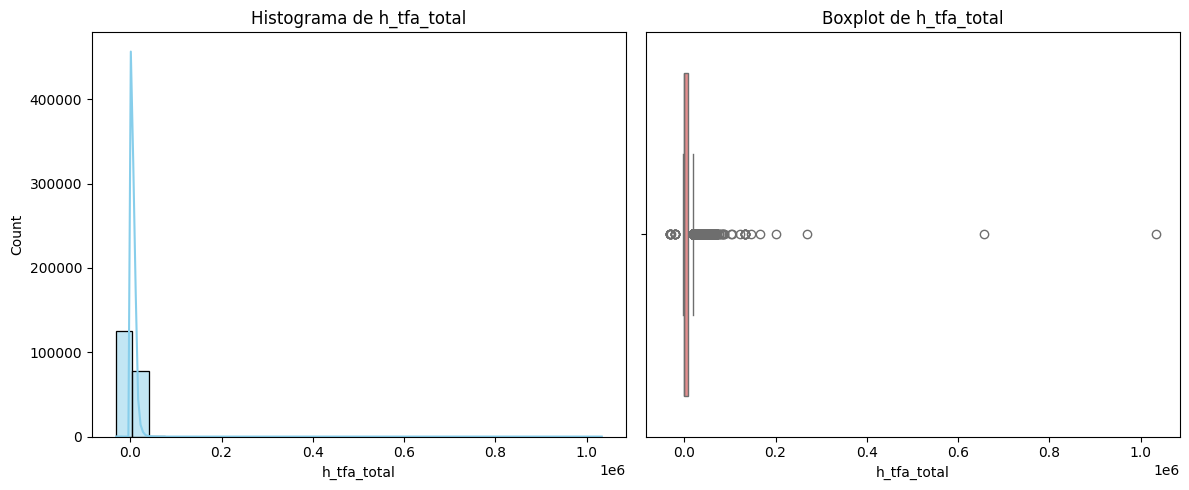

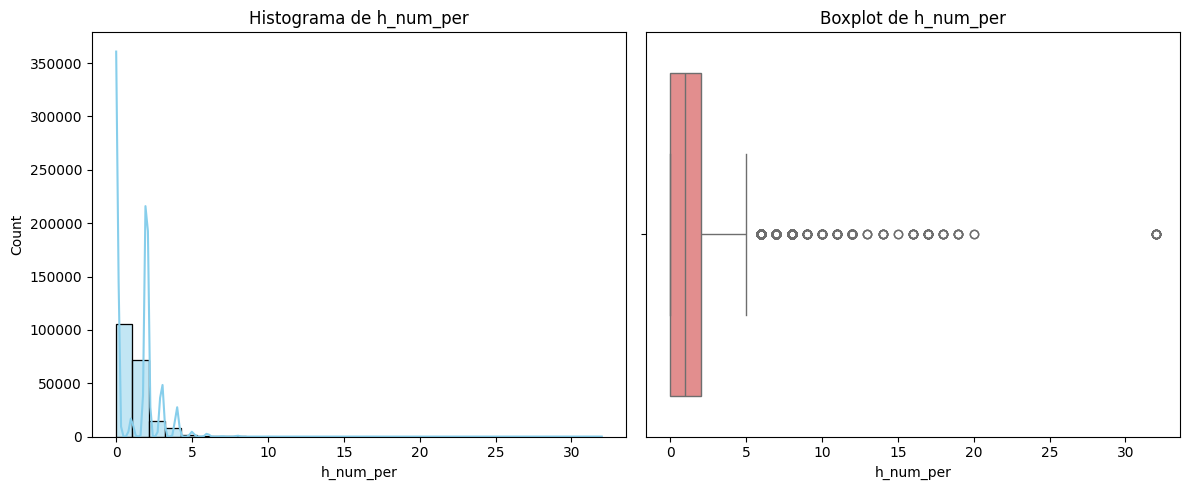

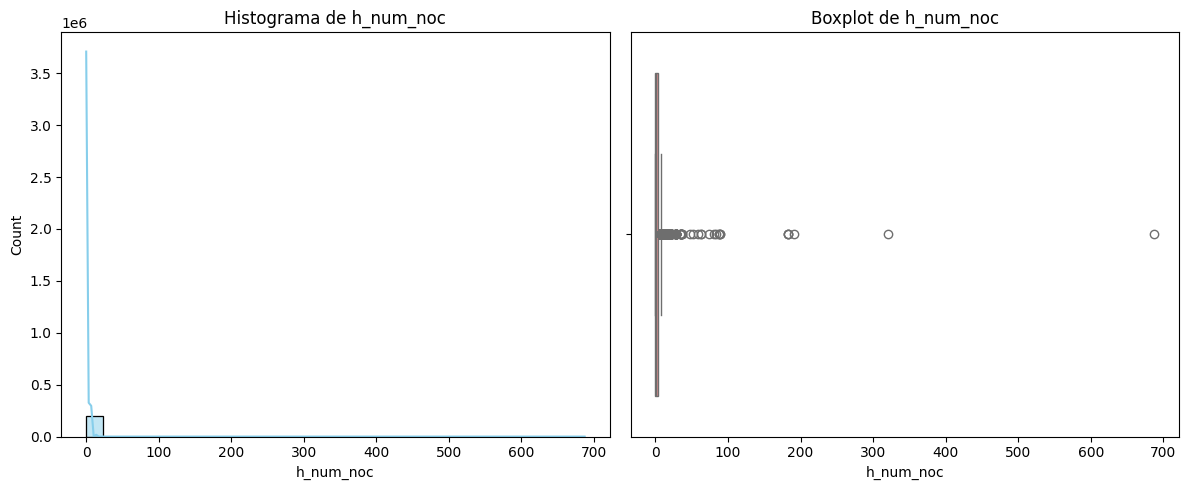

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot

columnas_numericas = ['h_tfa_total', 'h_num_per', 'h_num_noc']

for col in columnas_numericas:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(rsv[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=rsv[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()


## Visualización de la frecuencia de variables categóricas

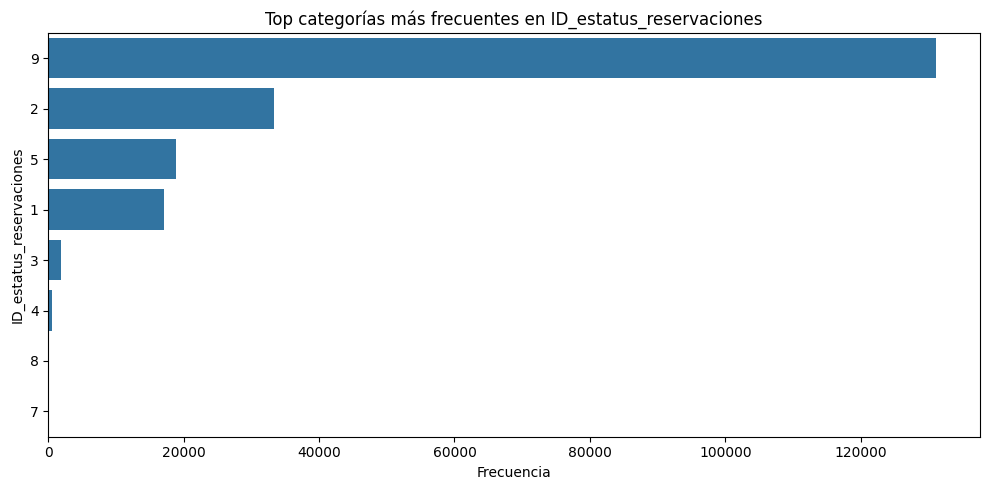

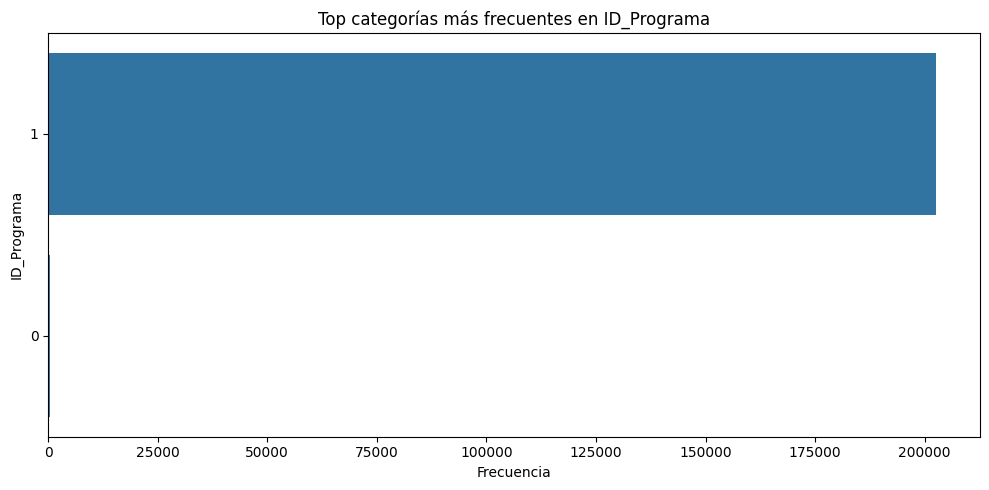

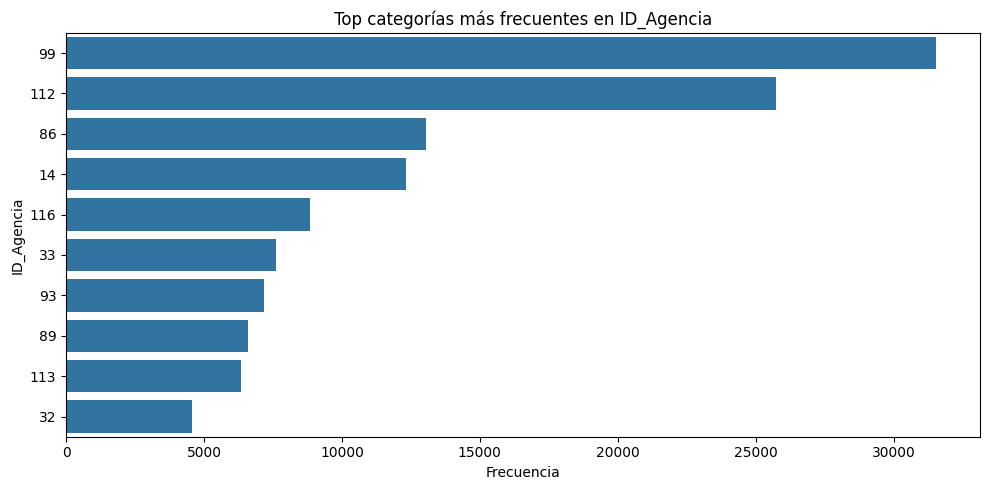

In [11]:
variables_categoricas = ['ID_estatus_reservaciones', 'ID_Programa', 'ID_Agencia']

for col in variables_categoricas:
    plt.figure(figsize=(10, 5))
    rsv[col] = rsv[col].astype(str).str.strip().str.upper()
    sns.countplot(y=rsv[col], order=rsv[col].value_counts().index[:10])
    plt.title(f'Top categorías más frecuentes en {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## Valores imposibles

Se identificaron y filtraron valores imposibles en el conjunto de datos, considerando las siguientes reglas de validación lógica:

- **Variables de conteo de personas o habitaciones** (`h_num_per`, `h_num_adu`, `h_num_men`, `h_num_noc`, `h_tot_hab`, y sus duplicados `aa_*`):
  - No pueden ser negativos.
  - Se espera que el número total de personas (`h_num_per`) sea al menos la suma de adultos y menores.
  - El número de noches (`h_num_noc`) debe ser positivo.

- **Montos económicos (`h_tfa_total`)**:
  - No se aceptan valores negativos en tarifas.

- **ID de referencia (`ID_*`)**:
  - No deben ser negativos. Aunque pueden ser cero si representan "sin asignar".

- **Campos booleanos o binarios (`Cliente_Disp`, `aa_Cliente_Disp`, `Reservacion`)**:
  - Deben tener valores en {0, 1}. Se filtraron valores distintos.

- **Fechas (`*_fec_*`)**:
  - Se eliminaron fechas imposibles (año menor a 1900 o mayor a 2100).


In [12]:
# Asegurarse de que las columnas tengan el tipo adecuado

conteos = []
for col in conteos:
    rsv[col] = pd.to_numeric(rsv[col], errors='coerce')  # Convierte valores no numéricos a NaN

# Filtrar solo valores mayores o iguales a 0
for col in conteos:
    rsv = rsv[rsv[col] >= 0]

rsv = rsv[rsv['h_num_per'] >= (rsv['h_num_adu'] + rsv['h_num_men'])]
rsv = rsv[rsv['h_num_noc'] > 0]
rsv = rsv[rsv['h_tfa_total'] >= 0]

id_cols = [col for col in rsv.columns if col.startswith('ID_')]
for col in id_cols:
    rsv[col] = pd.to_numeric(rsv[col], errors='coerce')  # Asegurar que los IDs sean numéricos
    rsv = rsv[rsv[col] >= 0]

bin_cols = ['Cliente_Disp', 'Reservacion']
for col in bin_cols:
    rsv = rsv[rsv[col].isin([0, 1])]

fecha_cols = [col for col in rsv.columns if 'fec' in col or 'Fecha' in col]
for col in fecha_cols:
    if pd.api.types.is_datetime64_any_dtype(rsv[col]):
        rsv = rsv[(rsv[col].dt.year >= 1900) & (rsv[col].dt.year <= 2100)]


 ## Identificación de Outliers

In [13]:
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[columna] < Q1 - 1.5 * IQR) | (df[columna] > Q3 + 1.5 * IQR)]
    return outliers

col_outliers = ['h_tfa_total', 'h_num_per', 'h_num_noc']

for col in col_outliers:
    out = detectar_outliers(rsv, col)
    print(f"{col}: {len(out)} outliers detectados")

h_tfa_total: 141 outliers detectados
h_num_per: 706 outliers detectados
h_num_noc: 139 outliers detectados


h_tfa_total: 141 outliers detectados


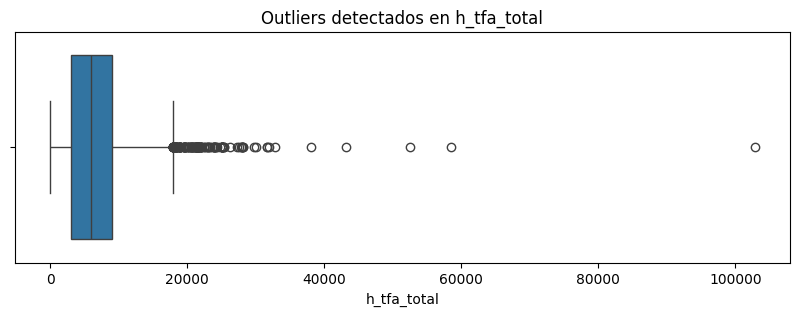

h_num_per: 706 outliers detectados


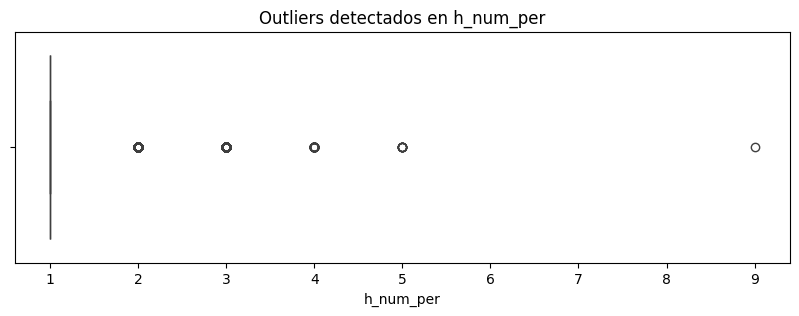

h_num_noc: 139 outliers detectados


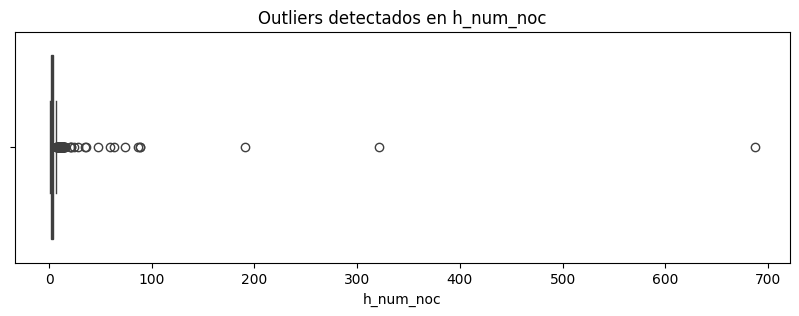

In [14]:
def detectar_outliers_iqr(col):
    Q1 = rsv[col].quantile(0.25)
    Q3 = rsv[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = rsv[(rsv[col] < Q1 - 1.5 * IQR) | (rsv[col] > Q3 + 1.5 * IQR)]
    return outliers

for col in columnas_numericas:
    outliers = detectar_outliers_iqr(col)
    print(f'{col}: {len(outliers)} outliers detectados')

    # Visualización
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=rsv[col])
    plt.title(f'Outliers detectados en {col}')
    plt.show()


## Corrección de Outliers

Se detectaron outliers en las siguientes variables:

- `h_tfa_total` (141 outliers): distribución no normal (Shapiro-Wilk p=0.0000).
- `h_num_per` (706 outliers): distribución no normal (p=0.0000).
- `h_num_noc` (139 outliers): distribución no normal (p=0.0000).

Debido a la **no normalidad** de la mayoría de las variables, se utilizó el método de IQR para detectar y corregir outliers. Los valores fuera de los límites (Q1 - 1.5×IQR, Q3 + 1.5×IQR) fueron truncados (winsorized) al percentil más alto/límite permitido para evitar distorsión en análisis posteriores sin perder filas.

La advertencia de `scipy.stats.shapiro` indicando “range zero” se presenta cuando todos los valores de una variable son idénticos, por lo que no se puede evaluar su distribución. En este caso, simplemente se descarta el test y se trata como dato constante.


In [15]:
import numpy as np

def winsorize_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers corregidos")
    
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

cols_to_correct = ['h_tfa_total', 'h_num_per', 'h_num_noc']

for col in cols_to_correct:
    winsorize_iqr(rsv, col)

h_tfa_total: 141 outliers corregidos
h_num_per: 706 outliers corregidos
h_num_noc: 139 outliers corregidos


## Distribución normal

In [16]:
from scipy.stats import shapiro
for col in col_outliers:
    p = shapiro(rsv[col].dropna().sample(min(len(rsv[col]), 500)))[1]
    print(f"{col} sigue una distribución {'normal' if p > 0.05 else 'no normal'} (p={p:.4f})")

h_tfa_total sigue una distribución no normal (p=0.0000)
h_num_per sigue una distribución normal (p=1.0000)
h_num_noc sigue una distribución no normal (p=0.0000)


/Users/manuelrodriguez/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


## QQ Plots y pruebas de normalidad

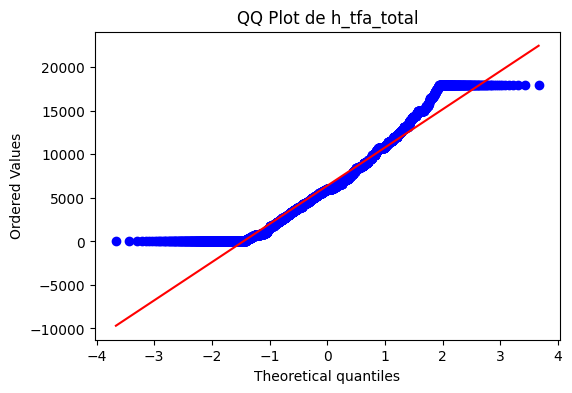

h_tfa_total - Shapiro-Wilk: p-value = 0.0000 (no normal)


/Users/manuelrodriguez/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5575.
  res = hypotest_fun_out(*samples, **kwds)


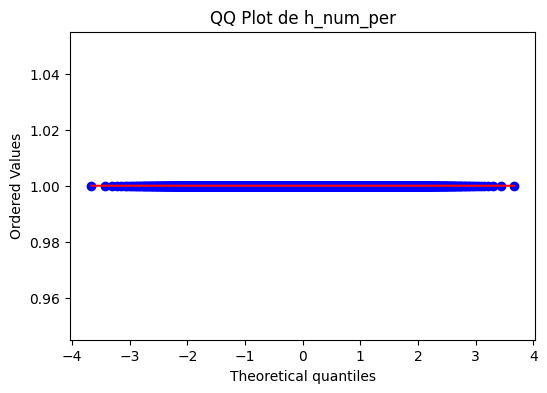

h_num_per - Shapiro-Wilk: p-value = 1.0000 (normal)


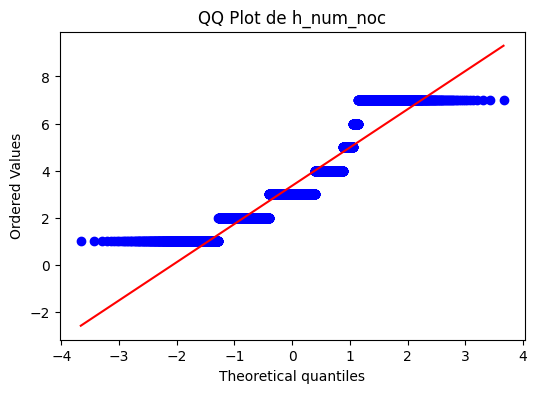

h_num_noc - Shapiro-Wilk: p-value = 0.0000 (no normal)


In [17]:
for col in columnas_numericas:
    plt.figure(figsize=(6, 4))
    probplot(rsv[col].dropna(), dist='norm', plot=plt)
    plt.title(f'QQ Plot de {col}')
    plt.show()

    stat, p = shapiro(rsv[col].dropna())
    print(f"{col} - Shapiro-Wilk: p-value = {p:.4f} ({'normal' if p > 0.05 else 'no normal'})")

## Valores Desbalanceados

In [18]:
categoricos = ['ID_estatus_reservaciones', 'ID_Segmento_Comp', 'ID_canal']
for col in categoricos:
    print(f"\nDistribución en {col}:")
    print(rsv[col].value_counts(normalize=True))


Distribución en ID_estatus_reservaciones:
ID_estatus_reservaciones
9    0.860448
2    0.097578
3    0.023139
1    0.010224
4    0.007175
8    0.001076
5    0.000359
Name: proportion, dtype: float64

Distribución en ID_Segmento_Comp:
ID_Segmento_Comp
17    0.183318
12    0.180807
5     0.156054
16    0.104215
14    0.095067
18    0.064753
1     0.050762
8     0.031928
9     0.029417
13    0.024036
4     0.022601
10    0.014529
11    0.013991
7     0.011300
6     0.010224
19    0.006637
3     0.000179
2     0.000179
Name: proportion, dtype: float64

Distribución en ID_canal:
ID_canal
1     0.492018
4     0.337578
10    0.069238
7     0.044484
0     0.019013
8     0.016682
13    0.010583
5     0.005381
9     0.003587
11    0.000897
2     0.000359
3     0.000179
Name: proportion, dtype: float64


## Identificación de Valores Categóricos

In [19]:
cat_cols = []# Esta es una lista donde guardaremos las columnas categóricas

cat_cols += list(rsv.select_dtypes(include='object').columns)

# También consideraremos columnas tipo int64 
n_rows = len(rsv)
for col in rsv.select_dtypes(include='int64').columns:
    if rsv[col].nunique() <= n_rows * 0.05:
        cat_cols.append(col)

cat_cols = list(set(cat_cols))  # eliminar duplicados

print("Columnas categóricas identificadas:")
print(cat_cols)


Columnas categóricas identificadas:
['h_can_res', 'moneda_cve', 'ID_Pais_Origen', 'ID_Segmento_Comp', 'h_edo', 'ID_empresa', 'h_num_men', 'ID_canal', 'h_cod_reserva', 'Cliente_Disp', 'ID_Paquete', 'Reservacion', 'ID_estatus_reservaciones', 'ID_Agencia', 'h_codigop', 'h_tot_hab', 'h_num_adu', 'ID_Tipo_Habitacion', 'ID_Programa']


## Limpieza de Valores Categóricos

Se realizó una limpieza sistemática de las columnas categóricas detectadas. El proceso incluyó:

- **Conversión a string** para columnas tipo código (`object` o `int64`) donde el valor representa una categoría nominal.
- **Eliminación de espacios en blanco**, mayúsculas/minúsculas unificadas, caracteres invisibles.
- **Agrupación de valores poco frecuentes** en una categoría "Otro" para evitar sobreajuste en modelos.
- **Sustitución de valores vacíos o nulos** por "Desconocido" (si son `object`) o `-1` (si son codificados como `int`).


In [20]:
from unidecode import unidecode

for col in cat_cols:
    if rsv[col].dtype == 'object':
        
        rsv[col] = rsv[col].astype(str).str.strip().str.lower().apply(unidecode)
        
       
        rsv[col] = rsv[col].replace(['', 'nan', 'none'], 'desconocido')
        rsv[col] = rsv[col].fillna('desconocido')
        
        value_counts = rsv[col].value_counts(normalize=True)
        rare_cats = value_counts[value_counts < 0.01].index
        if len(value_counts) > 20:
            rsv[col] = rsv[col].apply(lambda x: 'otro' if x in rare_cats else x)
    
    elif pd.api.types.is_integer_dtype(rsv[col]):

        rsv[col] = rsv[col].fillna(-1)
        
        uniques = rsv[col].unique()
        if any(rsv[col] < 0):
            print(f"{col} contiene valores inválidos")

In [21]:
import os

data_folder = '/Users/manuelrodriguez/Documents/Proyectos/DataWrangling/Data'
archives = [archivo for archivo in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, archivo))]
print(archives)
print(len(archives))

['iar_Transacciones1.csv', 'iar_Est_Ingresos_Diarios.csv', 'iar_Agencias.csv', 'iar_Detalles_Vtas.csv', 'iar_hothsp1_pan.csv', 'iar_hot_est.csv', 'iar_Ocupaciones.csv', 'iar_Cancelaciones.csv', 'iar_repitencia.csv', 'iar_ingresos_diarios.csv', 'iar_hothsp_pan.csv', 'iar_hotvta2_pan.csv', 'iar_fechas.csv', 'iar_ingresosxhabitaciones.csv', 'rsv_limpio.csv', 'iar_hoteles_market.csv', 'iar_empresas2.csv', 'iar_Reservas.csv', 'iar_hottra1_pan.csv', 'iar_Ocupaciones3.csv', 'iar_empresas.csv', 'iar_Paises_origen.csv', 'iar_presupuestos_ingresos.csv', 'iar_Reservaciones.csv']
24


In [22]:
# Guardar el DataFrame limpio como archivo CSV
output_path = '/Users/manuelrodriguez/Documents/Proyectos/DataWrangling/Data/rsv_limpio.csv'
rsv.to_csv(output_path, index=False)
print(f"DataFrame limpio guardado en: {output_path}")

DataFrame limpio guardado en: /Users/manuelrodriguez/Documents/Proyectos/DataWrangling/Data/rsv_limpio.csv
